# Ejercicio 3 - Clasificación de dígitos

Usarémos la información de la base de datos `mnist`.

## Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

## Paso 1: Obtención de datos

Cargamos los datos en un `dataframe` de pandas.

In [9]:
data = mnist.load_data()

## Paso 2: Preprocesamiento de datos

Separamos los datos en:

- **x_train**: entrada, conjunto de training.
- **y_train**: salida, conjunto de training.
- **x_test**: entrada, conjunto de testing.
- **x_test**: salida, conjunto de testing.

In [10]:
(x_train, y_train), (x_test, y_test) = data

# Normalización
x_train = x_train / 255.0
x_test = x_test / 255.0

## Paso 3: Creación del modelo


In [11]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(15, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 15)                11775     
                                                                 
 dense_6 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [7]:
model2 = Sequential()

model2.add(Flatten(input_shape=(28, 28)))
model2.add(Dense(30, activation="relu"))
model2.add(Dense(15, activation="relu"))
model2.add(Dense(10, activation="softmax"))

model2.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 30)                23550     
                                                                 
 dense_3 (Dense)             (None, 15)                465       
                                                                 
 dense_4 (Dense)             (None, 10)                160       
                                                                 
Total params: 24,175
Trainable params: 24,175
Non-trainable params: 0
_________________________________________________________________


In [4]:
model3 = Sequential()

model3.add(Flatten(input_shape=(28, 28)))
model3.add(Dense(128, activation="relu"))
model3.add(Dense(10, activation="softmax"))

model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Paso 4: Entrenamiento del modelo

In [12]:
model.fit(x_train, y_train, verbose=2, batch_size=1024, epochs=50)

Epoch 1/50
59/59 - 1s - loss: 2.1658 - accuracy: 0.2215 - 699ms/epoch - 12ms/step
Epoch 2/50
59/59 - 0s - loss: 1.8657 - accuracy: 0.4299 - 394ms/epoch - 7ms/step
Epoch 3/50
59/59 - 0s - loss: 1.5998 - accuracy: 0.5876 - 349ms/epoch - 6ms/step
Epoch 4/50
59/59 - 0s - loss: 1.3761 - accuracy: 0.6696 - 369ms/epoch - 6ms/step
Epoch 5/50
59/59 - 0s - loss: 1.1993 - accuracy: 0.7145 - 405ms/epoch - 7ms/step
Epoch 6/50
59/59 - 0s - loss: 1.0656 - accuracy: 0.7446 - 375ms/epoch - 6ms/step
Epoch 7/50
59/59 - 0s - loss: 0.9637 - accuracy: 0.7675 - 367ms/epoch - 6ms/step
Epoch 8/50
59/59 - 0s - loss: 0.8841 - accuracy: 0.7852 - 362ms/epoch - 6ms/step
Epoch 9/50
59/59 - 0s - loss: 0.8202 - accuracy: 0.8002 - 365ms/epoch - 6ms/step
Epoch 10/50
59/59 - 0s - loss: 0.7680 - accuracy: 0.8118 - 366ms/epoch - 6ms/step
Epoch 11/50
59/59 - 0s - loss: 0.7243 - accuracy: 0.8221 - 362ms/epoch - 6ms/step
Epoch 12/50
59/59 - 0s - loss: 0.6873 - accuracy: 0.8306 - 353ms/epoch - 6ms/step
Epoch 13/50
59/59 - 0s -

In [ ]:
model2.fit(x_train, y_train, verbose=2, batch_size=512, epochs=200)

In [5]:
model3.fit(x_train, y_train, verbose=2, epochs=6, batch_size=32)

Epoch 1/6
1875/1875 - 9s - loss: 0.2605 - accuracy: 0.9256 - 9s/epoch - 5ms/step
Epoch 2/6
1875/1875 - 7s - loss: 0.1154 - accuracy: 0.9657 - 7s/epoch - 4ms/step
Epoch 3/6
1875/1875 - 8s - loss: 0.0780 - accuracy: 0.9762 - 8s/epoch - 5ms/step
Epoch 4/6
1875/1875 - 7s - loss: 0.0586 - accuracy: 0.9818 - 7s/epoch - 4ms/step
Epoch 5/6
1875/1875 - 7s - loss: 0.0448 - accuracy: 0.9865 - 7s/epoch - 4ms/step
Epoch 6/6
1875/1875 - 7s - loss: 0.0357 - accuracy: 0.9890 - 7s/epoch - 4ms/step


## Paso 5: Evaluación del modelo

Usamos el conjunto de test para saber que tan bien funciona el modelo creado.

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3461 - accuracy: 0.9038


[0.34611666202545166, 0.9038000106811523]

In [ ]:
model2.evaluate(x_test, y_test)

In [6]:
model3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9772


[0.07372896373271942, 0.9771999716758728]

## Paso 6: Predicción de nuevos datos

Usamos la entrada del conjunto de testeo (que no fue usado para entrenar el modelo) y obtenemos las predicciones outputeadas.

Es una versión manual del paso anterior.

Modelo 1


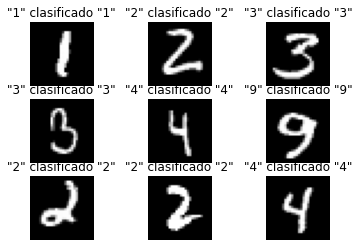

In [14]:
def draw(model, i_model):
    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=-1)
    images = np.random.randint(0, 10000, 9)
    print(f"Modelo {i_model}")
    for i in range(9):
        image = images[i]
        original_image = x_test[image, :]
        original_tag = y_test[image]
        predicted_tag = y_pred[image]
    
        plt.subplot(3, 3, i+1)
        plt.imshow(original_image, cmap='gray')
        plt.axis('off')
        plt.title('"{}" clasificado "{}"'.format(original_tag, predicted_tag))

draw(model, 1)